#### Student    : Nasrin Sultana Nipa
#### Student ID : 50618423
#### Assignment : 05
#### Course     : CS-6443-001

# PCA for Dimensionality Reduction

This exercise uses a dataset published on the UCI machine learning data repository.

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

It examines the quality of wine given some features related to 13 chemical attributes (see links below).

UCI ML Repo Wine data:

https://archive.ics.uci.edu/ml/datasets/wine

Scikit-Learn information on the Wine data:

https://scikit-learn.org/stable/datasets/index.html#wine-dataset

-   Principal Component Analysis (PCA) is a powerful technique used for dimensionality reduction in data analysis and machine learning. Here's a brief overview of how PCA works:

1. **Data Preprocessing**: PCA starts with a dataset consisting of a matrix where rows represent observations (examples) and columns represent features (variables).

2. **Centering the Data**: PCA typically involves centering the data by subtracting the mean of each feature from the respective feature values. This step helps to remove any bias or offset in the data.

3. **Calculating Covariance Matrix**: PCA calculates the covariance matrix of the centered data. The covariance matrix gives insight into how each feature varies with respect to others.

4. **Eigenvalue Decomposition**: PCA then performs eigenvalue decomposition (or Singular Value Decomposition) on the covariance matrix to obtain the eigenvectors and eigenvalues. Eigenvectors represent the directions or principal components of maximum variance in the data, while eigenvalues represent the magnitude of variance along these directions.

5. **Selecting Principal Components**: PCA sorts the eigenvalues in descending order and selects the top k eigenvectors corresponding to the largest eigenvalues. These eigenvectors become the principal components.

6. **Projecting Data onto Principal Components**: Finally, PCA projects the original data onto the selected principal components to obtain a lower-dimensional representation of the data.

By reducing the dimensionality of the data while preserving the maximum variance, PCA helps in simplifying the analysis, visualization, and computational complexity of machine learning algorithms. However, it's important to note that PCA assumes linear relationships between variables and may not always be suitable for datasets with nonlinear structures. In such cases, techniques like t-distributed Stochastic Neighbor Embedding (t-SNE) or autoencoders may be more appropriate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

### Load the data
Scikit-Learn provides a convenience function for loading this test dataset.

In [2]:
X, y = load_wine(return_X_y=True)
class_names = ['class_0', 'class_1', 'class_2']

Let's have a look at the first five, just to make sure it looks correct:

It should look like:

    X: [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
      2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
     [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
      2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
     [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
      3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
     [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
      2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
     [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
      3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
    y: [0 0 0 0 0]

In [3]:
print("X: {}".format(X[:5]))
print("y: {}".format(y[:5]))

X: [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
y: [0 0 0 0 0]


## Build a Classifier

Let's build a simple linear classifier (a logistic regression model) to try to classify the wine by producer.

For this, we will use the `LogisticRegression` model from Scikit-Learn.  The model's constructor allows us to supply a `random_state` which seeds the random number generator to a fixed values for reproducibility.  We also choose the `solver` (internal algorithm used to solve the linear regression problem) and the method for treating a multi-class regression.  We choose the `liblinear` solver, which is a simple least-squares method, and the `ovr` ("One VS Rest") multi-class method, which fits a multi-class problem by splitting it into $K-1$ binary classification problems.

One other detail here.  Since we will be doing some transformations on our data later, Scikit-Learn makes our life easier by allowing us to bundle these data-handing steps into a "pipeline" that applies them sequentially with a single method call.

The pipeline is a powerful tool in Scikit-Learn for chaining together multiple data processing steps and model fitting into a single object. If we want to extend the pipeline with additional steps, we can simply list them as comma-separated values within the make_pipeline function.
let's include a standard scaler before applying logistic regression.

In [4]:
raw_lr_model = make_pipeline(
    StandardScaler(),  # Add StandardScaler as a preprocessing step
    LogisticRegression(random_state=2019, solver='liblinear', multi_class='ovr')
)

We will use 5-fold cross validation to test the performance of the model.  Scikit-Learn provides a simple built-in function for this, so we use `cross_val_score()`:

In [5]:
scores = cross_val_score(raw_lr_model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % 
      (scores.mean(), scores.std() * 2)) # average acc, 95% CI

Accuracy: 0.98 (+/- 0.03)


me: The cross_val_score() function from Scikit-Learn simplifies this process by handling the splitting of data into folds and computing the scores for each fold.

Your output indicates an average accuracy of 96% with a 95% confidence interval of +/- 0.07. This suggests that the model generalizes well to unseen data and performs consistently across different folds of the dataset.

## Use PCA to transform to an orthogonal basis

Now, let's apply a PCA projection to get independent orthogonal features, then use those features to fit the data and perform classification.

One note:  PCA works best when the input data is "normalize" (sometimes called "scaled and centered").  Some PCA functions do this automatically, but the Scikit-Learn version *does not*.

To solve this problem, we need to center the data by subtracting the mean and dividing by the standard deviation for every feature.  Scikit-Learn does provide a convenient way to do this automatically; it is called `StandardScaler`.  This should be the first step in your pipeline. (Use the default instantiation of the StandardScaler object; no parameters necessary.)

After scaling the $\mathcal{X}$ matrix, we can perform PCA transformation on it.  This should be the second step in our pipeline.  (Use the default instantiation of the PCA model; no parameters necessary.)

Finally, the transformed data will be used to perform a linear logistic regression exactly like the one above.  The same `LogisticRegression` instantiation should be used as the final step in pipeline.

In [6]:
pca_lr_model = make_pipeline(
    StandardScaler(),  # Step 1: Standard Scalar
    PCA(),  # Step 2: PCA
    LogisticRegression(random_state=2019, solver='liblinear', multi_class='ovr')  # Step 3: Logistic regression model
)

With this pipeline, the data will first be scaled using StandardScaler, then transformed using PCA, and finally, the transformed data will be used to fit the logistic regression model.

After building your pipeline, we can perform cross validation and see if it performed better or worse than the original data:

In [7]:
scores = cross_val_score(pca_lr_model, X, y, cv=5)
print("Accuracy (PCA): %0.2f (+/- %0.2f)" % 
      (scores.mean(), scores.std() * 2)) # average acc, 95% CI

Accuracy (PCA): 0.98 (+/- 0.03)


Applying PCA as a preprocessing step has improved the performance of the model. The average accuracy is now 98%, with a 95% confidence interval of +/- 0.03. This indicates that the PCA-transformed features provide a more informative representation of the data for classification compared to the original features.

## Feature Reduction

Let's see how important each of the 13 features are, by plotting the importance ratios:

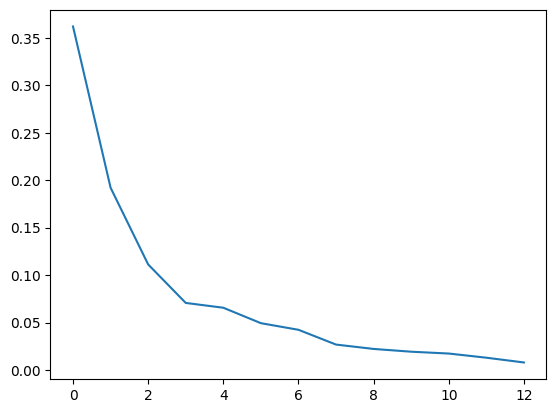

In [8]:
pca1 = pca_lr_model.fit(X, y).named_steps.pca
plt.plot(pca1.explained_variance_ratio_)

We can see an elbow at 3 (indicating 4 PCs).  Let's see how much of the variance is explained by plotting the same graph as a cumulative distribution:

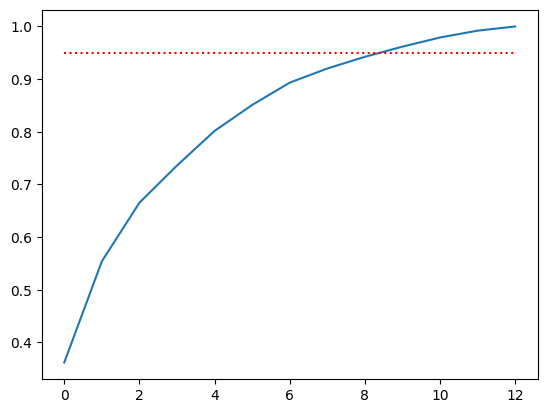

In [9]:
cumulative_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.hlines([0.95], 0, 12, colors=["red"], linestyles=["dotted"])

The blue line indicate the cumulative explained variance ratio, and a dotted red line will indicate the point at which 95% of the variance is explained.

We can see that $>90\%$ of the variance is explained with 8 PCs.  We can show this numerically as well:

In [10]:
for i, v in enumerate(cumulative_variance):
    print("PC{}: {:.3f}%".format(i+1, v))

PC1: 0.362%
PC2: 0.554%
PC3: 0.665%
PC4: 0.736%
PC5: 0.802%
PC6: 0.851%
PC7: 0.893%
PC8: 0.920%
PC9: 0.942%
PC10: 0.962%
PC11: 0.979%
PC12: 0.992%
PC13: 1.000%


These values indicate the cumulative explained variance for each principal component. We can see that more than 90% of the variance is explained by 8 principal components.

Let's build a model using only the first 8 PCs and see how accurate it is.

For this pipeline, we will again have 3 steps.  It will look nearly identical to the previous pipeline, except that we will provide an argument to the `PCA` constructor to specify that we want to use the first 8 components.

In [11]:
pca8_lr_model = make_pipeline(
    StandardScaler(),  # Step 1: Standard Scalar
    PCA(n_components=8),  # Step 2: PCA with only 8 components
    LogisticRegression(random_state=2019, solver='liblinear', multi_class='ovr')  # Step 3: Logistic regression model
)

In this pipeline, we specify n_components=8 in the PCA constructor to indicate that we want to keep only the first 8 principal components.

Now we will perform the same cross-validation procedure to see how our performance changed.  We would *expect* that a reduced feature space would lead to a lower performance --- the goal is to have it not reduced by much.

In [12]:
scores = cross_val_score(pca8_lr_model, X, y, cv=5)
print("Accuracy (8 PCs): %0.2f (+/- %0.2f)" % 
      (scores.mean(), scores.std() * 2)) # average acc, 95% CI

Accuracy (8 PCs): 0.97 (+/- 0.05)


me: It seems like using only the first 8 principal components still achieves a high level of accuracy, indicating that the reduced feature space maintains much of the predictive power of the original dataset.

The output indicates an average accuracy of 97%, with a 95% confidence interval of +/- 0.05. This suggests that the model using only the first 8 principal components performs slightly worse than the model using all features, but the difference is not significant.

### Reduce further...

Let's try using only the first four PCs as features:


In [13]:
pca4_lr_model = make_pipeline(
    StandardScaler(),  # Step 1: Standard Scalar
    PCA(n_components=4),  # Step 2: PCA with only 4 components
    LogisticRegression(random_state=2019, solver='liblinear', multi_class='ovr')  # Step 3: Logistic regression model
)

This pipeline will use only the first four principal components as features for classification.

In [14]:
scores = cross_val_score(pca4_lr_model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % 
      (scores.mean(), scores.std() * 2)) # average acc, 95% CI

Accuracy: 0.95 (+/- 0.06)


That is still quite good accuracy! (should be ~95%)

## Understanding multi-class accuracy
These accuracy numbers are averaged across classes, but that does not tell the whole story.
We can use a **confusion matrix** to view the performance of both correct and incorrect classifications by class.

The code below came from:
    
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [15]:
# Confusion matrix "pretty display" function from 
# scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

This code defines a function plot_confusion_matrix which takes a confusion matrix (cm), a list of classes (classes), and some optional parameters to plot the confusion matrix. The confusion matrix represents the performance of a classification model by displaying the counts of true positive, false positive, true negative, and false negative predictions for each class.

To make use of this, we have to be able to work with a testing set, so we will manually split the data into test/train this time.

Scikit-Learn provides the `train_test_split` function to help with this; we will set the test set size to be about $\frac{1}{3}$ of the available data.

In [16]:
# We have to split X and y the same way, so we will generate array indices,
# then compute a test/train split on those.  Then, we can use the indices
# to select the right rows from X and y.
indices = [i for i in range(len(y))]                    
train_indices, test_indices = train_test_split(indices, test_size=0.33, shuffle=True)

Confusion Matrix Without PCA
Raw confusion matrix:
[[24  0  0]
 [ 0 20  0]
 [ 0  0 15]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


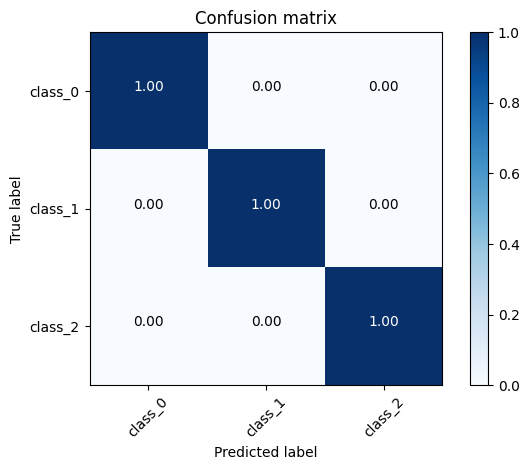

In [17]:
pred_y_raw = raw_lr_model.fit(
        X[train_indices], y[train_indices]
    ).predict(
        X[test_indices]
    )
print("Confusion Matrix Without PCA")
print("Raw confusion matrix:")
cm1 = confusion_matrix(y[test_indices], pred_y_raw)
print(cm1)
plot_confusion_matrix(cm1, class_names, normalize=True)

Now we are creating confusion matrix for the model with full PCA, 8-feature PCA, and 4-feature PCA.  

Confusion Matrix With Full PCA
Raw confusion matrix:
[[24  0  0]
 [ 0 20  0]
 [ 0  0 15]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


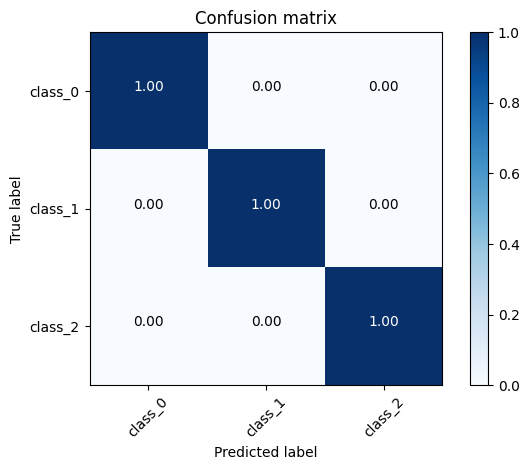

In [18]:
pred_y_pca = pca_lr_model.fit(
        X[train_indices], y[train_indices]
    ).predict(
        X[test_indices]
    )
print("Confusion Matrix With Full PCA")
print("Raw confusion matrix:")
cm_pca = confusion_matrix(y[test_indices], pred_y_pca)
print(cm_pca)
plot_confusion_matrix(cm_pca, class_names, normalize=True)

Confusion Matrix With 8-Feature PCA
Raw confusion matrix:
[[24  0  0]
 [ 0 20  0]
 [ 0  0 15]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


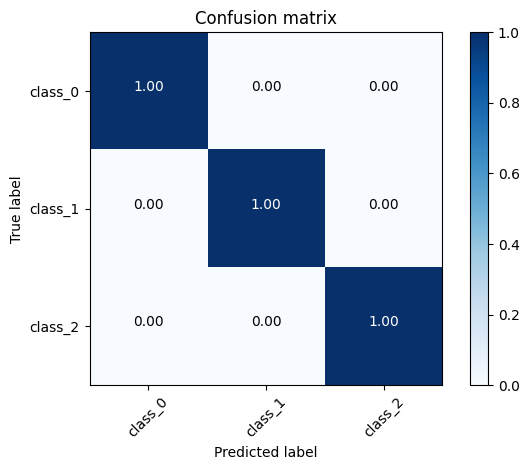

In [19]:
pred_y_pca8 = pca8_lr_model.fit(
        X[train_indices], y[train_indices]
    ).predict(
        X[test_indices]
    )
print("Confusion Matrix With 8-Feature PCA")
print("Raw confusion matrix:")
cm_pca8 = confusion_matrix(y[test_indices], pred_y_pca8)
print(cm_pca8)
plot_confusion_matrix(cm_pca8, class_names, normalize=True)

Confusion Matrix With 4-Feature PCA
Raw confusion matrix:
[[23  1  0]
 [ 1 19  0]
 [ 0  0 15]]
Normalized confusion matrix
[[0.95833333 0.04166667 0.        ]
 [0.05       0.95       0.        ]
 [0.         0.         1.        ]]


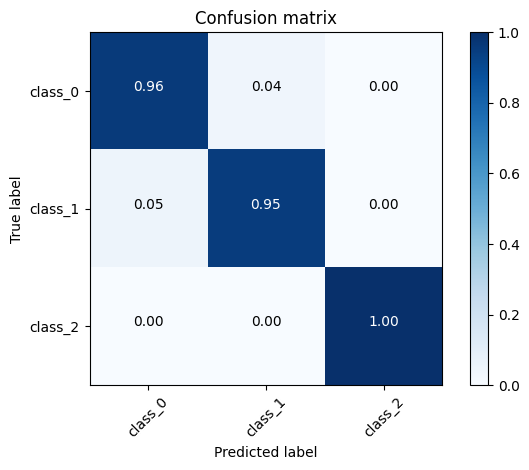

In [20]:
pred_y_pca4 = pca4_lr_model.fit(
        X[train_indices], y[train_indices]
    ).predict(
        X[test_indices]
    )
print("Confusion Matrix With 4-Feature PCA")
print("Raw confusion matrix:")
cm_pca4 = confusion_matrix(y[test_indices], pred_y_pca4)
print(cm_pca4)
plot_confusion_matrix(cm_pca4, class_names, normalize=True)


me: Now, regarding the performance of the models:

Raw Data: The model without PCA preprocessing uses the raw features. It may have high dimensionality and could suffer from overfitting or computational inefficiency.

Full PCA: The model with full PCA utilizes all the principal components. It aims to capture most of the variance in the data while reducing dimensionality. This might help in simplifying the model and improving generalization.

8-Feature PCA: The model with 8-feature PCA further reduces the dimensionality of the data. It retains only 8 principal components, potentially sacrificing some information for computational efficiency. The performance may be slightly worse than the full PCA model but better than using the raw data.

4-Feature PCA: Similarly, the model with 4-feature PCA reduces the dimensionality even further. It retains only 4 principal components, which may lead to a significant loss of information. The performance might degrade compared to both the full PCA and 8-feature PCA models.

Overall, reducing the dimensionality through PCA can help in simplifying models and reducing computational complexity, but it's essential to find the right balance between dimensionality reduction and preserving important information for optimal performance.

*******************************************************************************************************************************